In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
os.getcwd()

'/home/parmardiwakar150'

In [5]:
path = os.path.join(os.getcwd(), 'Dataset')

In [6]:
path

'/home/parmardiwakar150/Dataset'

In [7]:
sz=224
arch=resnet34

In [8]:
data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch, sz))

In [14]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)#56 was best

epoch      trn_loss   val_loss   accuracy                    
    0      0.471765   0.30095    0.909     
    1      0.324159   0.339929   0.912                       
    2      0.262392   0.24141    0.921                       
    3      0.231217   0.270399   0.922                       
    4      0.174173   0.300606   0.921                       
    5      0.17027    0.258806   0.921                       
    6      0.158885   0.291697   0.919                       
    7      0.153144   0.321171   0.92                        
    8      0.132251   0.32034    0.929                       
    9      0.129689   0.2975     0.926                       



[array([0.2975]), 0.9260000009536743]

In [11]:
lrf=learn.lr_find()

 90%|████████▉ | 169/188 [00:04<00:00, 37.55it/s, loss=2.64]


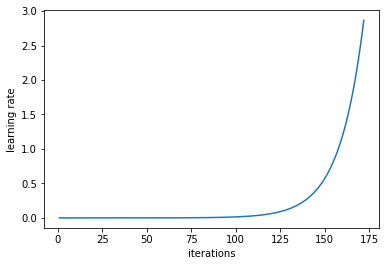

In [12]:
learn.sched.plot_lr()

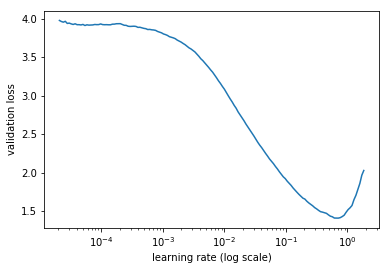

In [13]:
learn.sched.plot()

In [15]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [16]:
def get_augs():
    data = ImageClassifierData.from_paths(path, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [17]:
ims = np.stack([get_augs() for i in range(6)])

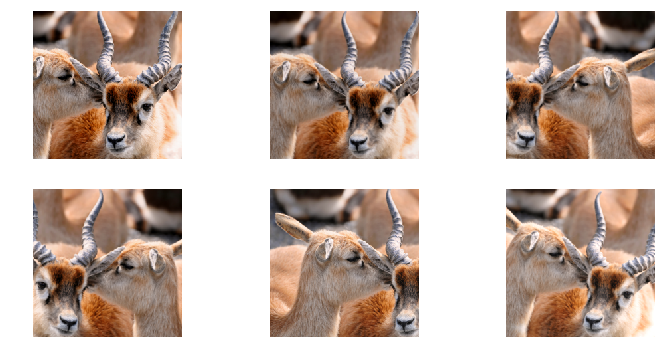

In [18]:
plots(ims, rows=2)

In [19]:
data = ImageClassifierData.from_paths(path, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [22]:
learn.fit(1e-3, 1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.256532   0.281542   0.913     



[array([0.28154]), 0.9129999995231628]

In [23]:
learn.precompute=False

In [24]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.292415   0.253855   0.919     
    1      0.303326   0.255331   0.916                       
    2      0.282512   0.254508   0.919                       



[array([0.25451]), 0.9189999995231628]

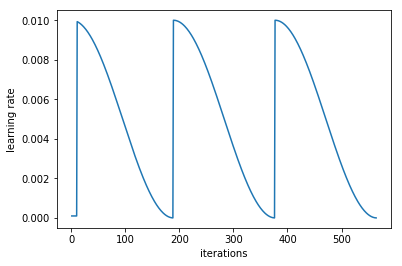

In [25]:
learn.sched.plot_lr()

In [26]:
learn.save('224_lastlayer')

In [27]:
learn.load('224_lastlayer')

In [28]:
learn.unfreeze()

In [29]:
lr=np.array([1e-4,1e-3,1e-2])

In [ ]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.091591   0.208628   0.942     
 94%|█████████▍| 177/188 [05:50<00:21,  1.98s/it, loss=0.0825]

In [41]:
learn.load('224_all')

In [65]:
log_preds,y = learn.TTA()
#accuracy_np(log_preds,y)

In [66]:
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.947

In [67]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)

In [68]:
im = val_tfms(open_image('/home/parmardiwakar150/Dataset/valid/wolf/Img-12135.jpg'))

In [69]:
learn.precompute=False

In [70]:
preds = learn.predict_array(im[None])

In [71]:
preds

array([[-11.46951, -14.31479, -13.46267, -11.06142, -15.24942, -14.35343, -13.41113,  -9.69724, -14.60633,
         -9.45484,  -9.72969, -16.08196, -11.81734, -15.27334, -15.13124, -10.98549, -13.23989, -12.55139,
        -12.78011, -13.53915, -11.95757, -15.49706, -12.28055, -13.20702, -14.91315, -13.75175, -13.06974,
        -15.07141, -15.29202,  -0.00028]], dtype=float32)

In [72]:
preds.reshape(30,)

array([-11.46951, -14.31479, -13.46267, -11.06142, -15.24942, -14.35343, -13.41113,  -9.69724, -14.60633,
        -9.45484,  -9.72969, -16.08196, -11.81734, -15.27334, -15.13124, -10.98549, -13.23989, -12.55139,
       -12.78011, -13.53915, -11.95757, -15.49706, -12.28055, -13.20702, -14.91315, -13.75175, -13.06974,
       -15.07141, -15.29202,  -0.00028], dtype=float32)

In [73]:
np.argmax(preds)

29

In [74]:
np.exp(preds.reshape(30,))

array([0.00001, 0.     , 0.     , 0.00002, 0.     , 0.     , 0.     , 0.00006, 0.     , 0.00008, 0.00006,
       0.     , 0.00001, 0.     , 0.     , 0.00002, 0.     , 0.     , 0.     , 0.     , 0.00001, 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.99972], dtype=float32)

In [51]:
predictions = []

In [52]:
for i in range(1,6001):
    im = val_tfms(open_image(os.path.join(os.getcwd(), f'test/Img-{i}.jpg')))
    preds = learn.predict_array(im[None])
    predictions.append(np.exp(preds.reshape(30,)))

In [53]:
prediction = pd.DataFrame(np.array(predictions).reshape(6000, 30))

In [54]:
prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,7.784936e-08,6.152224e-09,2.305125e-07,7.295688e-08,9.996701e-01,3.153175e-09,3.858272e-08,1.421196e-07,6.107364e-09,1.055548e-07,...,5.094260e-08,3.897793e-08,1.219835e-06,5.987991e-09,2.109257e-08,9.557055e-09,9.485883e-09,1.774344e-06,2.712905e-08,5.114225e-09
1,3.626792e-05,4.036642e-04,1.779514e-05,1.628464e-03,1.097537e-04,2.407246e-03,7.201712e-05,2.570308e-04,6.397180e-05,3.989390e-04,...,9.497077e-04,6.993442e-04,2.131077e-03,5.822805e-04,6.207090e-01,3.303681e-05,1.338501e-03,1.080237e-03,5.012831e-05,6.398973e-05
2,3.661732e-04,2.351813e-04,3.881129e-05,3.672430e-04,6.257380e-03,3.858197e-05,3.839311e-04,1.250630e-05,1.245419e-05,2.578999e-05,...,5.417997e-04,4.577119e-05,1.298706e-01,3.325157e-06,1.398206e-04,8.664249e-06,6.130575e-06,9.229768e-06,4.689433e-06,2.161173e-03
3,6.736173e-07,3.828497e-05,3.674758e-07,3.269325e-06,5.713969e-08,8.106104e-05,7.472580e-07,4.990833e-06,2.962670e-06,9.920659e-06,...,9.930567e-01,5.345390e-05,2.639024e-08,1.234893e-06,2.397186e-03,3.190965e-05,8.150790e-06,1.519624e-07,1.926420e-03,1.183047e-05
4,2.288453e-06,3.255361e-02,6.111026e-04,1.235703e-06,2.999593e-05,1.303852e-02,8.618170e-05,1.171457e-03,2.772396e-05,5.128053e-03,...,1.754383e-03,4.621907e-01,9.505000e-07,1.530369e-05,8.067116e-04,3.530422e-04,3.421441e-05,2.562563e-05,6.728376e-02,6.861598e-06


In [55]:
prediction.columns = data.classes

In [56]:
prediction.head()

,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,...,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,7.784936e-08,6.152224e-09,2.305125e-07,7.295688e-08,9.996701e-01,3.153175e-09,3.858272e-08,1.421196e-07,6.107364e-09,1.055548e-07,...,5.094260e-08,3.897793e-08,1.219835e-06,5.987991e-09,2.109257e-08,9.557055e-09,9.485883e-09,1.774344e-06,2.712905e-08,5.114225e-09
1,3.626792e-05,4.036642e-04,1.779514e-05,1.628464e-03,1.097537e-04,2.407246e-03,7.201712e-05,2.570308e-04,6.397180e-05,3.989390e-04,...,9.497077e-04,6.993442e-04,2.131077e-03,5.822805e-04,6.207090e-01,3.303681e-05,1.338501e-03,1.080237e-03,5.012831e-05,6.398973e-05
2,3.661732e-04,2.351813e-04,3.881129e-05,3.672430e-04,6.257380e-03,3.858197e-05,3.839311e-04,1.250630e-05,1.245419e-05,2.578999e-05,...,5.417997e-04,4.577119e-05,1.298706e-01,3.325157e-06,1.398206e-04,8.664249e-06,6.130575e-06,9.229768e-06,4.689433e-06,2.161173e-03
3,6.736173e-07,3.828497e-05,3.674758e-07,3.269325e-06,5.713969e-08,8.106104e-05,7.472580e-07,4.990833e-06,2.962670e-06,9.920659e-06,...,9.930567e-01,5.345390e-05,2.639024e-08,1.234893e-06,2.397186e-03,3.190965e-05,8.150790e-06,1.519624e-07,1.926420e-03,1.183047e-05
4,2.288453e-06,3.255361e-02,6.111026e-04,1.235703e-06,2.999593e-05,1.303852e-02,8.618170e-05,1.171457e-03,2.772396e-05,5.128053e-03,...,1.754383e-03,4.621907e-01,9.505000e-07,1.530369e-05,8.067116e-04,3.530422e-04,3.421441e-05,2.562563e-05,6.728376e-02,6.861598e-06


In [57]:
image_id = []
for i in range(1, 6001):
    image_id.append('Img-' + str(i) + '.jpg')

In [58]:
prediction.index = image_id

In [59]:
prediction.index.name = 'image_id'

In [60]:
prediction['image_id'] = image_id

In [61]:
prediction.head()

,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,...,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf,image_id
image_id,,,,,,,,,,,,,,,,,,,,,
Img-1.jpg,7.784936e-08,6.152224e-09,2.305125e-07,7.295688e-08,9.996701e-01,3.153175e-09,3.858272e-08,1.421196e-07,6.107364e-09,1.055548e-07,...,3.897793e-08,1.219835e-06,5.987991e-09,2.109257e-08,9.557055e-09,9.485883e-09,1.774344e-06,2.712905e-08,5.114225e-09,Img-1.jpg
Img-2.jpg,3.626792e-05,4.036642e-04,1.779514e-05,1.628464e-03,1.097537e-04,2.407246e-03,7.201712e-05,2.570308e-04,6.397180e-05,3.989390e-04,...,6.993442e-04,2.131077e-03,5.822805e-04,6.207090e-01,3.303681e-05,1.338501e-03,1.080237e-03,5.012831e-05,6.398973e-05,Img-2.jpg
Img-3.jpg,3.661732e-04,2.351813e-04,3.881129e-05,3.672430e-04,6.257380e-03,3.858197e-05,3.839311e-04,1.250630e-05,1.245419e-05,2.578999e-05,...,4.577119e-05,1.298706e-01,3.325157e-06,1.398206e-04,8.664249e-06,6.130575e-06,9.229768e-06,4.689433e-06,2.161173e-03,Img-3.jpg
Img-4.jpg,6.736173e-07,3.828497e-05,3.674758e-07,3.269325e-06,5.713969e-08,8.106104e-05,7.472580e-07,4.990833e-06,2.962670e-06,9.920659e-06,...,5.345390e-05,2.639024e-08,1.234893e-06,2.397186e-03,3.190965e-05,8.150790e-06,1.519624e-07,1.926420e-03,1.183047e-05,Img-4.jpg
Img-5.jpg,2.288453e-06,3.255361e-02,6.111026e-04,1.235703e-06,2.999593e-05,1.303852e-02,8.618170e-05,1.171457e-03,2.772396e-05,5.128053e-03,...,4.621907e-01,9.505000e-07,1.530369e-05,8.067116e-04,3.530422e-04,3.421441e-05,2.562563e-05,6.728376e-02,6.861598e-06,Img-5.jpg


In [62]:
prediction = prediction[['image_id', 'antelope', 'bat', 'beaver', 'bobcat', 'buffalo', 'chihuahua',
       'chimpanzee', 'collie', 'dalmatian', 'german+shepherd', 'grizzly+bear',
       'hippopotamus', 'horse', 'killer+whale', 'mole', 'moose', 'mouse',
       'otter', 'ox', 'persian+cat', 'raccoon', 'rat', 'rhinoceros', 'seal',
       'siamese+cat', 'spider+monkey', 'squirrel', 'walrus', 'weasel', 'wolf']]

In [64]:
prediction.to_csv('Predictions/fastai_snark.csv', index=False)